# MLP

c:\Users\Ramachandra\OneDrive\Desktop\Mango Project\mangoenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - accuracy: 0.4192 - loss: 7.2878 - val_accuracy: 0.6732 - val_loss: 0.7595
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.7128 - loss: 0.7049 - val_accuracy: 0.7303 - val_loss: 0.6785
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.7544 - loss: 0.6166 - val_accuracy: 0.7873 - val_loss: 0.4893
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.7162 - loss: 0.7226 - val_accuracy: 0.7566 - val_loss: 0.5742
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.7340 - loss: 0.6958 - val_accuracy: 0.7873 - val_loss: 0.4955
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - accuracy: 0.7565 - loss: 0.5482 - val_accuracy: 0.8114 - val_loss: 0.4671
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - accuracy: 0.7847 - loss: 0.5074 - val_accuracy: 0.7697 - val_loss: 0.5267
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.7950 - loss: 0.4924 - val_accu

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │    15,360,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,575,371 (177.67 MB)

 Trainable params: 15,525,123 (59.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,050,248 (118.45 MB)

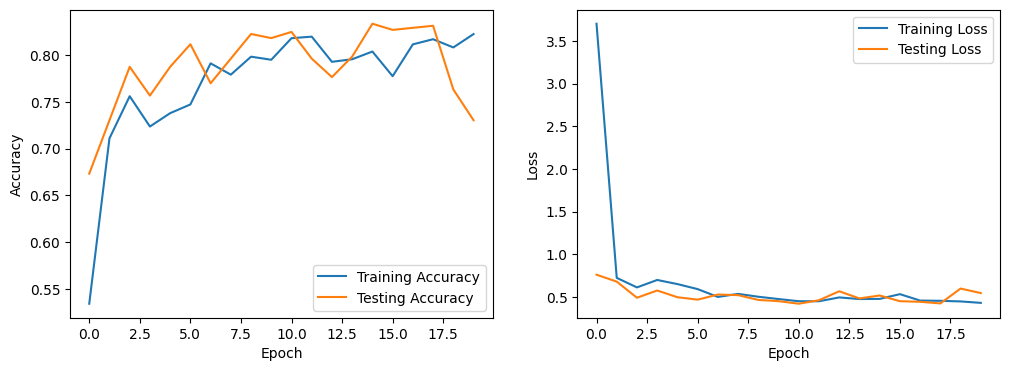

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


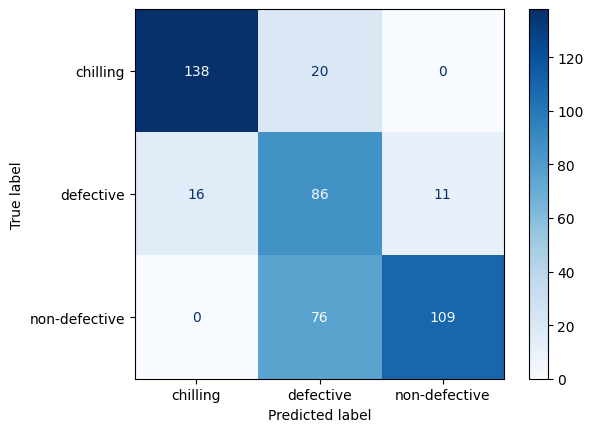

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Define root directory containing your image folders
data_dir = r"C:\Users\Ramachandra\OneDrive\Desktop\Mango Project"

# Define class labels (modify if your class names differ)
class_labels = ["chilling", "defective", "non-defective"]

# Function to load images and labels from a directory
def load_images_and_labels(folder_name, target_size=(100, 100)):
    images = []
    labels = []
    folder_path = os.path.join(data_dir, folder_name)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        # Load your image using cv2.imread() for image loading
        image = cv2.imread(image_path)  # Assuming OpenCV for image loading
        resized_image = cv2.resize(image, target_size)  # Resize image to target size
        images.append(resized_image)
        labels.append(class_labels.index(folder_name))  # Assign label based on folder name
    return images, labels

# Load data from each folder
chilling_images, chilling_labels = load_images_and_labels(class_labels[0])
defective_images, defective_labels = load_images_and_labels(class_labels[1])
non_defective_images, non_defective_labels = load_images_and_labels(class_labels[2])

# Combine images and labels from all classes
all_images = chilling_images + defective_images + non_defective_images
all_labels = chilling_labels + defective_labels + non_defective_labels

# Convert images and labels to numpy arrays
X = np.asarray(all_images).astype('float32') / 255.0  # Normalize images
y = np.asarray(all_labels)

# Flatten the images for the MLP
X = X.reshape((X.shape[0], -1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the MLP model
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plot model architecture
model.summary()

# Plot training vs testing accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training vs testing loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model and plot the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Saliency Map

c:\Users\Ramachandra\OneDrive\Desktop\Mango Project\mangoenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.5071 - loss: 0.9719 - val_accuracy: 0.7851 - val_loss: 0.5587
Epoch 2/2
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - accuracy: 0.7576 - loss: 0.5494 - val_accuracy: 0.8224 - val_loss: 0.4158


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,196,491 (19.82 MB)

 Trainable params: 1,732,163 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,464,328 (13.22 MB)

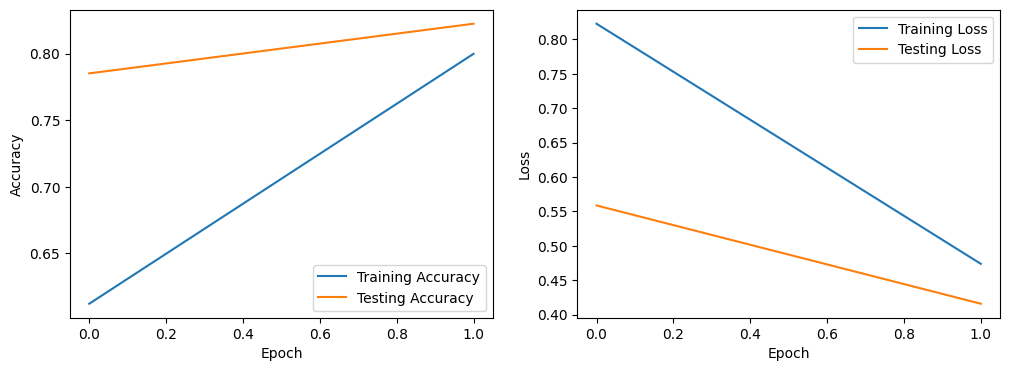

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


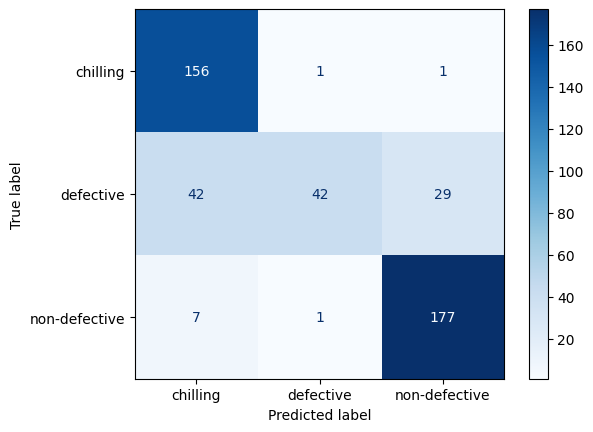

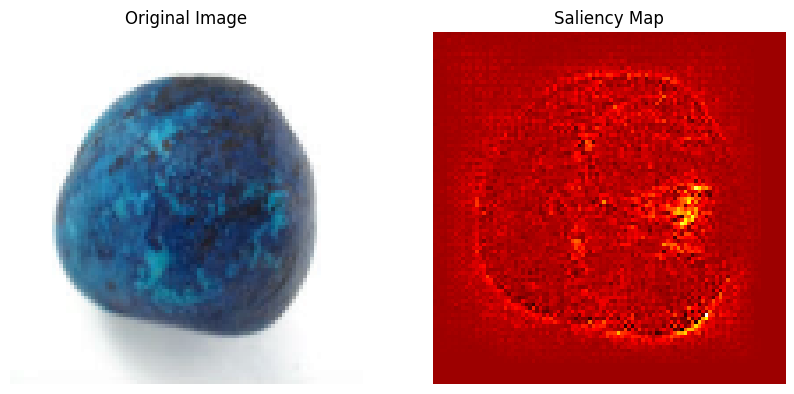

In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Define root directory containing your image folders
data_dir = r"C:\Users\Ramachandra\OneDrive\Desktop\Mango Project"

# Define class labels (modify if your class names differ)
class_labels = ["chilling", "defective", "non-defective"]

# Function to load images and labels from a directory
def load_images_and_labels(folder_name, target_size=(100, 100)):
    images = []
    labels = []
    folder_path = os.path.join(data_dir, folder_name)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, target_size)
        images.append(resized_image)
        labels.append(class_labels.index(folder_name))
    return images, labels

# Load data from each folder
chilling_images, chilling_labels = load_images_and_labels(class_labels[0])
defective_images, defective_labels = load_images_and_labels(class_labels[1])
non_defective_images, non_defective_labels = load_images_and_labels(class_labels[2])

# Combine images and labels from all classes
all_images = chilling_images + defective_images + non_defective_images
all_labels = chilling_labels + defective_labels + non_defective_labels

# Convert images and labels to numpy arrays
X = np.asarray(all_images).astype('float32') / 255.0  # Normalize images
y = np.asarray(all_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_labels), activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

# Plot model architecture
cnn_model.summary()

# Plot training vs testing accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model and plot the confusion matrix
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Saliency Map implementation
def compute_saliency(model, image, label):
    image = tf.convert_to_tensor(image)
    image = tf.cast(image, tf.float32)
    image = tf.Variable([image])

    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model(image)
        loss = predictions[:, label]

    gradients = tape.gradient(loss, image)
    gradients = tf.reduce_max(gradients, axis=-1).numpy()[0]

    return gradients

# Choose an image from the test set
sample_image = X_test[0]
sample_label = y_test[0]

# Compute saliency map
saliency_map = compute_saliency(cnn_model, sample_image, sample_label)

# Display original image and saliency map
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(array_to_img(sample_image))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.imshow(saliency_map, cmap='hot')
plt.axis('off')

plt.show()


# CNN

c:\Users\Ramachandra\OneDrive\Desktop\Mango Project\mangoenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.5368 - loss: 0.9749 - val_accuracy: 0.7171 - val_loss: 0.6181
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.7642 - loss: 0.5511 - val_accuracy: 0.7939 - val_loss: 0.5462
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - accuracy: 0.8250 - loss: 0.4264 - val_accuracy: 0.8684 - val_loss: 0.3752
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 201ms/step - accuracy: 0.8758 - loss: 0.3351 - val_accuracy: 0.8750 - val_loss: 0.3406
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - accuracy: 0.8900 - loss: 0.3152 - val_accuracy: 0.8904 - val_loss: 0.2443
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.8919 - loss: 0.2824 - val_accuracy: 0.8969 - val_loss: 0.2613
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 201ms/step - accuracy: 0.9101 - loss: 0.2463 - val_accuracy: 0.8991 - val_loss: 0.2672
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - accuracy: 0.9088 - loss: 0.2238 - val_accu

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,196,491 (19.82 MB)

 Trainable params: 1,732,163 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,464,328 (13.22 MB)

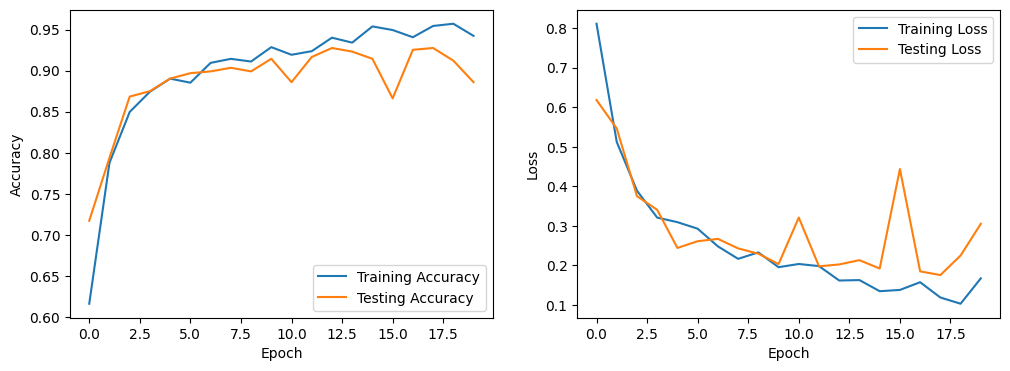

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


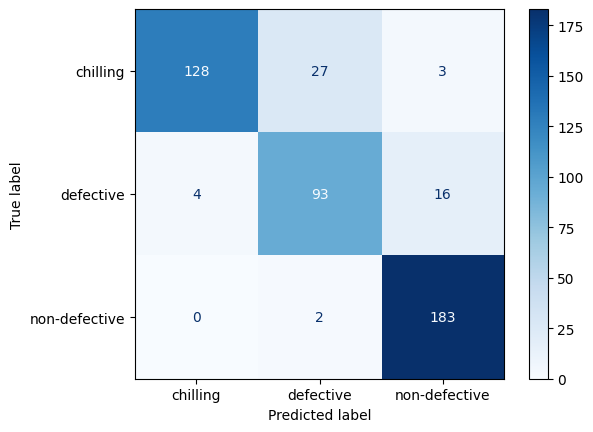

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Define root directory containing your image folders
data_dir = r"C:\Users\Ramachandra\OneDrive\Desktop\Mango Project"

# Define class labels (modify if your class names differ)
class_labels = ["chilling", "defective", "non-defective"]

# Function to load images and labels from a directory
def load_images_and_labels(folder_name, target_size=(100, 100)):
    images = []
    labels = []
    folder_path = os.path.join(data_dir, folder_name)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, target_size)
        images.append(resized_image)
        labels.append(class_labels.index(folder_name))
    return images, labels

# Load data from each folder
chilling_images, chilling_labels = load_images_and_labels(class_labels[0])
defective_images, defective_labels = load_images_and_labels(class_labels[1])
non_defective_images, non_defective_labels = load_images_and_labels(class_labels[2])

# Combine images and labels from all classes
all_images = chilling_images + defective_images + non_defective_images
all_labels = chilling_labels + defective_labels + non_defective_labels

# Convert images and labels to numpy arrays
X = np.asarray(all_images).astype('float32') / 255.0  # Normalize images
y = np.asarray(all_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plot model architecture
cnn_model.summary()

# Plot training vs testing accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model and plot the confusion matrix
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()


